In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from parametres import Paras
from utilities import *
from initialisation import *
from odes import odes_scale_size
import matplotlib.pyplot as plt
from size_scaled_func import *

Initialisation of parametres

In [2]:
def sim_run(N, M, para, assemblenum, tstop, teval):

    ### initialised parametres
    para = Paras(N, M)
    p, number = int_preferences(N, M, para.mu_c, assemblenum)
    D = int_conversion(M, para.Dbase, assemblenum)
    l = int_l(M, para.l_base, assemblenum)
    rho = int_rho(M, para.rho_base, assemblenum)
    vmax = int_vmax(N, M, para.v_max_base, p, number, assemblenum)
    m = int_mt(N, para.m_base, assemblenum)

    ## Initialised Initial conditions
    R0 = int_R(M, para.R0, assemblenum)
    C0 = int_C(N, para.w, assemblenum)

    # Load parametres
    para.paras(C0, R0, l, rho, p, vmax, m, D)
    time = np.linspace(0, tstop, teval)
    pars = (para.l, para.m, para.rho, para.mu, para.km, para.p, para.D, para.v_in_max, para.type, para.B0, para.M0, para.E0, para.alpha, para.gamma, para.R_half)
    y0 = np.concatenate((R0, C0)).reshape(M+N,) # initial conditions

    # run and store
    result = solve_ivp(
    odes_scale_size, t_span=[time[0], time[-1]], y0=y0, t_eval=time, args=pars, dense_output=True)

    Rt = result['y'][0:M]
    Ct = result['y'][M:M+N]
    t = result['t']

    return Rt, Ct, t, para
    

In [3]:
N = 50
M = 100
assemblenum = 1
para = Paras(N, M)

In [4]:
Rt_assemblies = []
Ct_assemblies = []
assemlies = 100
para_assemblies = []

In [5]:
# for i in range(assemlies):
#     Rt, Ct, t, para = sim_run(N, M, para, i, tstop=10e6, teval=10000)
#     Rt_assemblies.append(Rt)
#     Ct_assemblies.append(Ct)
#     para_assemblies.append(para)

In [8]:
Rt, Ct, t, para = sim_run(N, M, para, 4, tstop=1000, teval=10000)


In [10]:
t.shape

(10000,)

In [11]:
Rt.shape

(100, 10000)

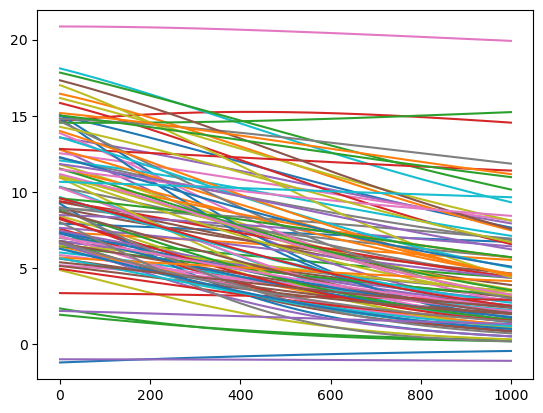

In [12]:
for i in range(M):
    plt.plot(t, Rt[i, :])

In [13]:
# for j in range(100):
#     for i in range(N):
#         Ct = Ct_assemblies[j]
#         plt.plot(t, Ct[i, :])

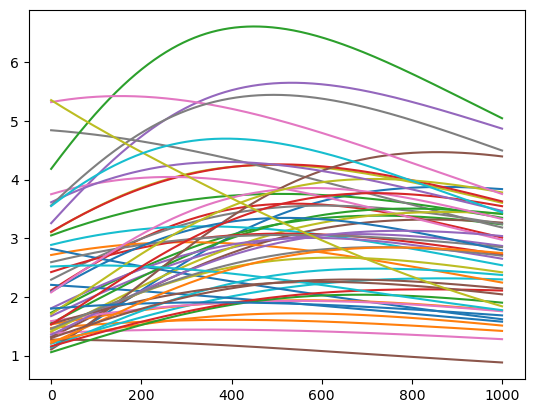

In [14]:
for i in range(N):
        #Ct = Ct_assemblies[j]
        plt.plot(t, Ct[i, :])

In [ ]:
mass = Ct_assemblies[i]
mass[:, 1]

IndexError: list index out of range

In [15]:
initial = np.empty((N*100))
final = np.empty((N*100))
for i in range(len(para_assemblies)):
    model = para_assemblies[i]
    initial[i*N:(i+1)*N] = model.C.reshape(N)
    mass = Ct_assemblies[i]
    final[i*N:(i+1)*N] = mass[:, -1]


f:\Anaconda3\envs\fyp\lib\site-packages\numpy\lib\histograms.py:810: RuntimeWarning: overflow encountered in scalar divide
  norm = n_equal_bins / _unsigned_subtract(last_edge, first_edge)
f:\Anaconda3\envs\fyp\lib\site-packages\numpy\lib\histograms.py:838: RuntimeWarning: invalid value encountered in multiply
  f_indices = _unsigned_subtract(tmp_a, first_edge) * norm
f:\Anaconda3\envs\fyp\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in cast
  indices = f_indices.astype(np.intp)


IndexError: index -9223372036854775808 is out of bounds for axis 0 with size 11

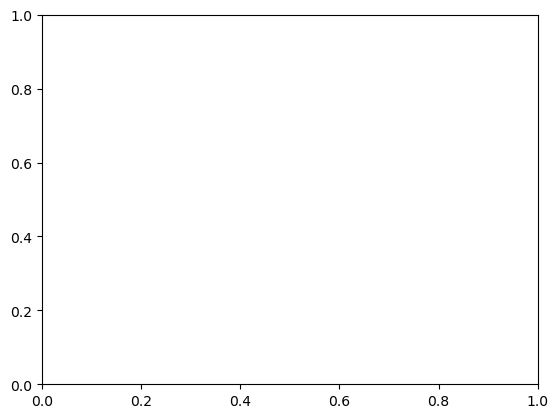

In [16]:
plt.hist(final, label='final', color='red')
plt.hist(initial, label='initial distirbution', color='grey')

(array([2350., 1052.,  640.,  343.,  251.,  176.,   88.,   53.,   33.,
          14.]),
 array([1.00062655, 1.87409436, 2.74756217, 3.62102998, 4.49449779,
        5.3679656 , 6.24143341, 7.11490122, 7.98836903, 8.86183684,
        9.73530465]),
 <BarContainer object of 10 artists>)

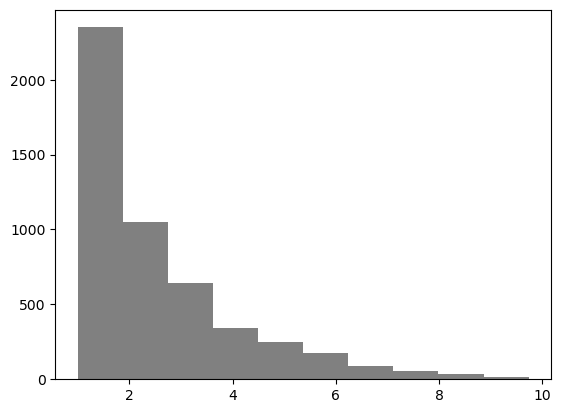

In [ ]:
plt.hist(initial, label='initial distirbution', color='grey')

In [ ]:
Rt.shape

(100, 10000)

In [ ]:
species1vg = []

In [ ]:
Ct[:, i]

array([2.64164634, 1.83383909, 2.49597463, 3.116086  , 1.26134628,
       1.77240636, 1.60862641, 5.11694465, 6.02260757, 1.79870305,
       5.29047632, 4.2139069 , 1.92025477, 2.06333958, 2.60030261,
       4.17444405, 1.22669933, 4.4984067 , 1.27151989, 3.79053939,
       3.55108114, 2.20525445, 8.49193827, 2.89543167, 1.89988534,
       1.32021555, 2.45205144, 1.72564041, 2.57875482, 1.47746698,
       5.50023383, 4.2772429 , 1.74714276, 1.75324953, 2.31788673,
       1.75698661, 1.17846419, 2.33162808, 1.16355995, 3.62394583,
       1.93532356, 1.92814068, 1.05522614, 1.61143875, 2.6184206 ,
       2.48735393, 1.2777847 , 7.84110786, 2.32233932, 1.63517513])

Text(0.5, 0, 'Time')

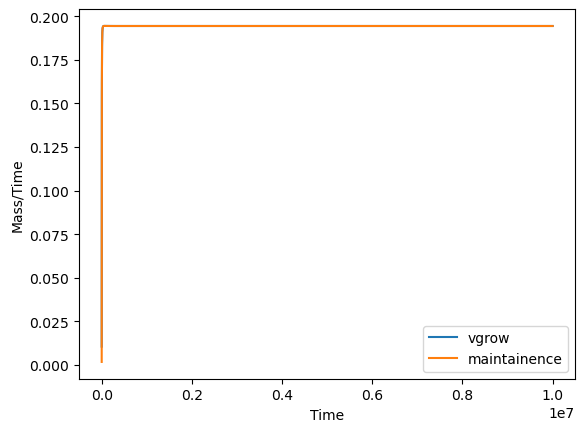

In [ ]:
species1vg = []
m1 = []
for i in range(len(t)):
    resourcet = Rt[:, i].reshape(M, 1)
    masst = Ct[:, i].reshape(N, 1)
    v_in = vin(para.p, resourcet, para.R_half, vmax=para.v_in_max, type=2)
    v_in = scale_vin(v_in, masst, para.B0, para.alpha)
    v_g = vgrow(v_in, para.l)
    v_g = v_g * masst
    species1vg.append(v_g[0])
    m_scale = scale_mt(para.m, masst, para.M0, para.alpha)
    m_scale = m_scale * masst
    m1.append(m_scale[0])
    

plt.plot(t, species1vg, label = 'vgrow')
plt.plot(t, m1, label='maintainence')
plt.legend()
plt.ylabel('Mass/Time')
plt.xlabel('Time')

In [ ]:
np.sign(-7)

-1